1. 주식 데이터 분석 및 예측
목표: 주식의 과거 데이터를 분석하여 추세를 파악하고, 머신러닝 모델을 사용해 주식 가격을 예측한다.
기술 분석: 이동 평균선(MA), 볼린저 밴드(Bollinger Bands) 등을 계산하고 시각화한다.
머신러닝 예측: 이전 가격 데이터를 사용해 랜덤 포레스트, XGBoost, 또는 LSTM 모델로 미래 주식 가격을 예측한다.
성능 평가: 예측된 주가와 실제 주가를 비교하고, MSE, RMSE 등을 계산하여 모델 성능을 평가한다.

1. 데이터 불러오기 및 기술 분석
먼저, 저장된 CSV 파일에서 주식 데이터를 불러오고 기술 분석을 수행한다.

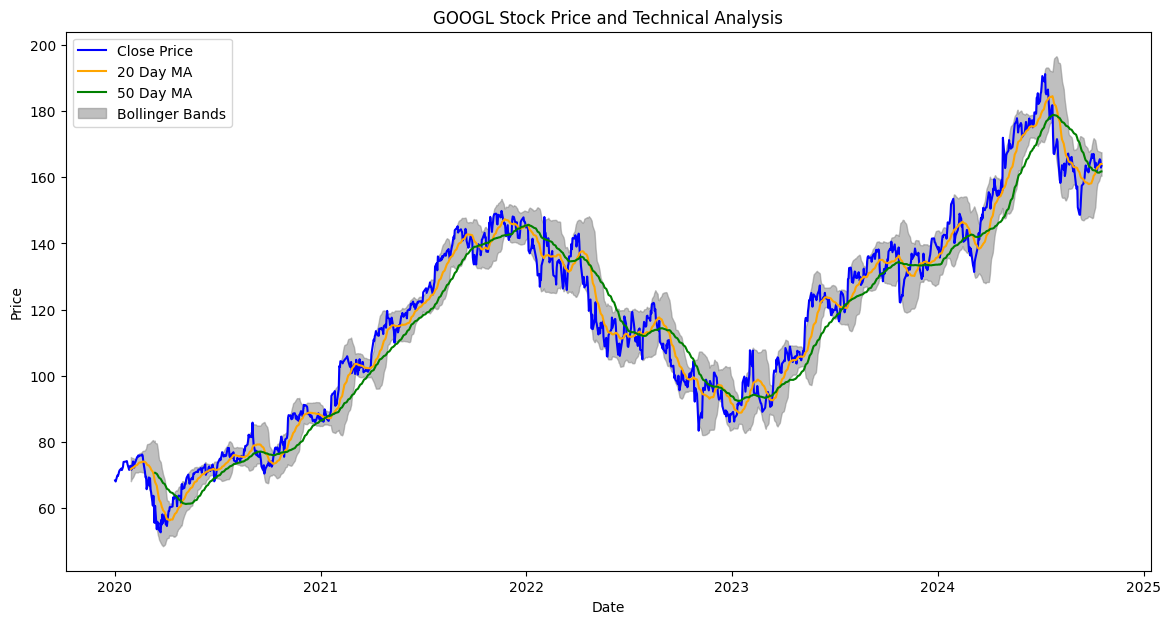

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV 파일에서 주식 데이터 불러오기
ticker = "GOOGL"  # 분석할 종목 (예: 애플)
data = pd.read_csv(f"./data/{ticker}_stock_data.csv", parse_dates=True, index_col='Date')

# 이동 평균선(MA) 계산
data['MA20'] = data['Close'].rolling(window=20).mean()  # 20일 이동 평균
data['MA50'] = data['Close'].rolling(window=50).mean()  # 50일 이동 평균

# 볼린저 밴드 계산
data['Upper Band'] = data['MA20'] + (data['Close'].rolling(window=20).std() * 2)
data['Lower Band'] = data['MA20'] - (data['Close'].rolling(window=20).std() * 2)

# 시각화
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['MA20'], label='20 Day MA', color='orange')
plt.plot(data['MA50'], label='50 Day MA', color='green')
plt.fill_between(data.index, data['Upper Band'], data['Lower Band'], color='gray', alpha=0.5, label='Bollinger Bands')
plt.title(f'{ticker} Stock Price and Technical Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

2. 머신러닝 예측
랜덤 포레스트 모델을 사용하여 주가를 예측한다.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 데이터 준비
data['Target'] = data['Close'].shift(-1)  # 다음 날 가격을 예측
data.dropna(inplace=True)  # NaN 제거

X = data[['Open', 'High', 'Low', 'Close', 'Volume', 'MA20', 'MA50']]
y = data['Target']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 훈련
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
predictions = model.predict(X_test)


3. 성능 평가
예측된 주가와 실제 주가를 비교하고 MSE, RMSE를 계산한다.

MSE: 7.53, RMSE: 2.74


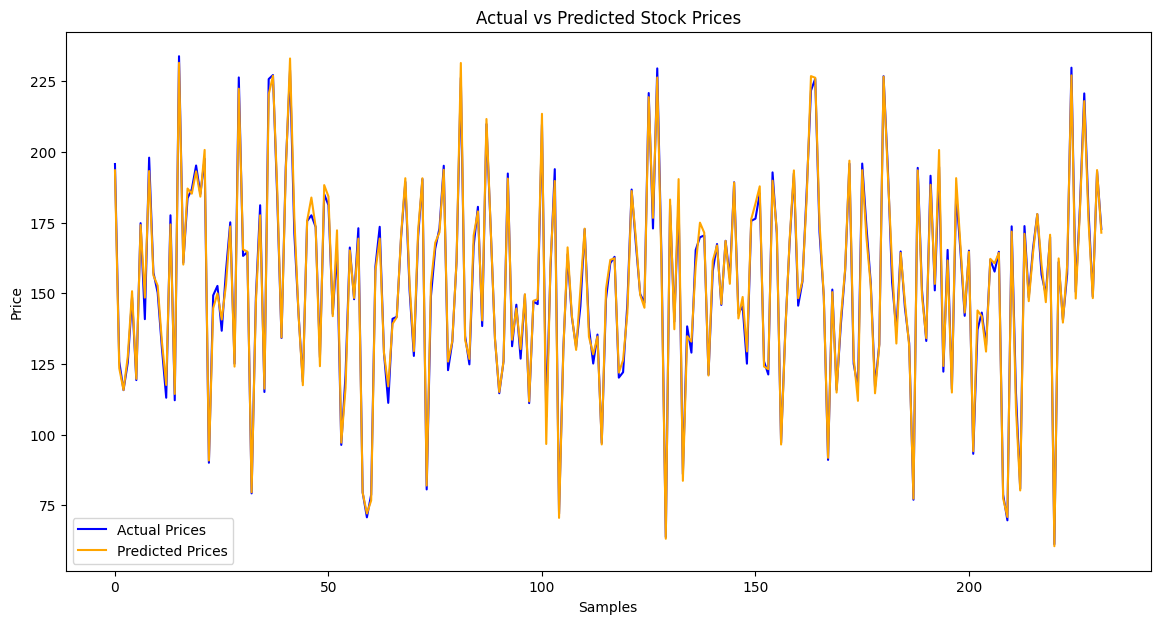

In [4]:
# 성능 평가
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f'MSE: {mse:.2f}, RMSE: {rmse:.2f}')

# 예측 결과 시각화
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='orange')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.legend()
plt.show()
